In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from gait_analysis import *
import os
from scipy.stats import sem

In [2]:
# load data from experiments ... input is the path to a directory that has gait data
# each experiment should be in a separate folder
# each treatment within an experiment should be in a separate folder
tardi_gait = '/Users/iwoods/ic_onedrive/tardi_gait'
os.chdir(tardi_gait)
for d in listDirectories():
    print(d)

2021_3iy_Fall
2021_caffeine_Fall
2021_ldopa_Fall
3iy_July2022
alcohol_43mM_June2022
analyzed_movies
caffeine_20µM_June2022
comps
micrometer_vids
nicotine_100µM_July2022
noTreatment_noTreatment_July2022
old_code
species_comps_2021
wild_T_July2022


In [3]:
exp = 'noTreatment_noTreatment_July2022'
exp_dir = os.path.join(tardi_gait, exp)
os.chdir(exp_dir)

# Get a list of available experiments in this directory
print('looking in ' + exp_dir )

for d in listDirectories():
    print(d)

looking in /Users/iwoods/ic_onedrive/tardi_gait/noTreatment_noTreatment_July2022
control
no_treatment


In [4]:
# choose which folders to compare
groupA = 'control'
groupB = 'no_treatment'
fname = 'all_step_data_swings.csv' # created by the script save_step_data.py

In [5]:
# treatment 1: select experiment(s) to analyze
# look for all_step_data_swings.csv in one or more folders, and combine data
df1 = experimentToDf(groupA,fname)
print('DF size',df1.shape)

# look for mov_data.txt in one or more folders, and parse to get size and speed for these clips
clips1 = np.unique(df1['clip'])
size_speed_1 = sizeAndSpeed(groupA, clips1)

df1[df1.ref_leg=='R3'].head(3)


Choose from this list (separate by commas if multiple choices): 
1: 1a025-034
2: 1a101-105
3: 2a001-006
4: 2a016-019
5: 2a029-034
6: 2a048-055
7: 2a058-062
8: 2a085-091
9: 2a100-104
10: 3a004-009
11: 3a027-033
12: 3a054-060
13: 3a075-080
14: 3a082-086
15: 3a109-116
16: select ALL

Which number(s) do you want? 16

You chose them all

Found 1a025-034/all_step_data_swings.csv
Found 1a101-105/all_step_data_swings.csv
Found 2a001-006/all_step_data_swings.csv
Found 2a016-019/all_step_data_swings.csv
Found 2a029-034/all_step_data_swings.csv
Found 2a048-055/all_step_data_swings.csv
Found 2a058-062/all_step_data_swings.csv
Found 2a085-091/all_step_data_swings.csv
Found 2a100-104/all_step_data_swings.csv
Found 3a004-009/all_step_data_swings.csv
Found 3a027-033/all_step_data_swings.csv
Found 3a054-060/all_step_data_swings.csv
Found 3a075-080/all_step_data_swings.csv
Found 3a082-086/all_step_data_swings.csv
Found 3a109-116/all_step_data_swings.csv
DF size (767, 19)
... converting from pixels to m

,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,anterior_swing_start,contralateral_swing_start,clip
16,R3,0.658,1.025,0.367,0.333,0.700,0.5243,1.1915,R4:0.595,R3:0.7621,R2:0.2857,R1:0.595,L1:0.3093,L2:0.7143,L3:0;0.1193,L4:0.3571;0.9529,R2:0.1429,L3:0.8571,1a025-034
17,R3,1.358,1.758,0.400,0.233,0.633,0.6319,1.8745,R4:0.3689,R3:0.816,R2:0.2101,R1:0.4739,L1:0.1319,L2:0.5269,L3:0.0,L4:0.658,R2:0;0.0521,L3:0.8957,1a025-034
18,R3,1.991,2.326,0.335,0.234,0.569,0.5888,2.4430,R4:0.1485,R3:0.7944,R2:0.1775,R1:0.5308,L1:0.0316,L2:0.6775,L3:0.0905,L4:0.5896,R2:0.0;0,L3:,1a025-034


In [6]:
# treatment 1: select experiment(s) to analyze
# look for all_step_data_swings.csv in one or more folders, and combine data
df2 = experimentToDf(groupB,fname)
print('DF size',df2.shape)

# look for mov_data.txt in one or more folders, and parse to get size and speed for these clips
clips2 = np.unique(df2['clip'])
size_speed_2 = sizeAndSpeed(groupB, clips2)

df2[df2.ref_leg=='R3'].head(3)


Choose from this list (separate by commas if multiple choices): 
1: 1a024-031
2: 1a034-041
3: 1a083-089
4: 1a091-097
5: 2a054-058
6: 2a063-073
7: 2a074-079
8: 2a098-103
9: 2a107-112
10: 2a122-125
11: 3a004-010
12: 3a040-044
13: 3a058-064
14: 3a066-074
15: 3a076-082
16: 3a084-090
17: 3a092-099
18: 3a105-112
19: select ALL

Which number(s) do you want? 19

You chose them all

Found 1a024-031/all_step_data_swings.csv
Found 1a034-041/all_step_data_swings.csv
Found 1a083-089/all_step_data_swings.csv
Found 1a091-097/all_step_data_swings.csv
Found 2a054-058/all_step_data_swings.csv
Found 2a063-073/all_step_data_swings.csv
Found 2a074-079/all_step_data_swings.csv
Found 2a098-103/all_step_data_swings.csv
Found 2a107-112/all_step_data_swings.csv
Found 2a122-125/all_step_data_swings.csv
Found 3a004-010/all_step_data_swings.csv
Found 3a040-044/all_step_data_swings.csv
Found 3a058-064/all_step_data_swings.csv
Found 3a066-074/all_step_data_swings.csv
Found 3a076-082/all_step_data_swings.csv
Found 3

,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,anterior_swing_start,contralateral_swing_start,clip
9,R3,0.473,1.240,0.767,0.268,1.035,0.7411,1.3740,R4:0.1609;0.9831,R3:0.8705,R2:0.4671,R1:,L1:0.6763,L2:,L3:0.3382,L4:0.5314,R2:0.3546,L3:0.2251,1a024-031
10,R3,1.508,2.475,0.967,0.233,1.200,0.8058,2.5915,R4:0.6946,R3:0.9029,R2:0.3887,R1:0.0558,L1:0.6529,L2:0.3892,L3:0.1804;0.875,L4:0.4025,R2:0.2775,L3:0.0833;0.7775,1a024-031
11,R3,2.708,3.376,0.668,0.234,0.902,0.7406,3.4930,R4:0.4246,R3:0.8703,R2:0.4618,R1:0.1109;0.8891,L1:0.3509,L2:0.1109;0.9074,L3:0.6292,L4:0.148;0.8149,R2:0.3326,L3:0.5177,1a024-031


In [38]:
# how many tardigrades in each group?
tardigrades_in_clip1 = np.unique(sorted([individualFromClipname(clipname) for clipname in clips1]))
print('Group 1 has ' + str(len(tardigrades_in_clip1)) + ' individual(s): ' + ', '.join(tardigrades_in_clip1))
tardigrades_in_clip1 = [int(x) for x in tardigrades_in_clip1]

tardigrades_in_clip2 = np.unique(sorted([individualFromClipname(clipname) for clipname in clips2]))
print('Group 2 has ' + str(len(tardigrades_in_clip2)) + ' individual(s): ' + ', '.join(tardigrades_in_clip2))
tardigrades_in_clip2 = [int(x) for x in tardigrades_in_clip2]

Group 1 has 3 individual(s): 1, 2, 3
Group 2 has 3 individual(s): 1, 2, 3


In [48]:
def get_paired_comparison_data(parameters, legs, groups, dataframes, size_speed_dictionaries):
       
    print('Comparing parameters for ' + ', '.join(legs) + ' in ' + ' & '.join(groups))    
    print(' ... looking at ' + ', '.join(parameters))
    
    # get individuals from clip names
    clips = np.unique(dataframes[0]['clip'])
    tardigrades = np.unique(sorted([int(individualFromClipname(clipname)) for clipname in clips]))
    
    # dictionary of different types of data for different tardigrades
    # tardigrade_data['group']['tardigrade']['datatype'] = data
    tardigrade_data = {} # keyed on group
    
    for group in groups:
        
        tardigrade_data[group] = {} # keyed on tardigrade
        
        for tardigrade in tardigrades:
            tardigrade_data[group][tardigrade] = {} # keyed on data type
    
    # go through speed / size and get the things
    
    # go through each parameter that is in the dataframe in get info for each clip and tardigrade
    for parameter in parameters:
    
        # go through each group   
        for i, group in enumerate(groups):

            # which dataframe are we looking at?
            df = dataframes[i]

            # which size & speed dictionary do we need?
            size_speed = size_speed_dictionaries[i]

            # get clips in df
            clips = np.unique(df['clip'])

            # go through each clip
            for clip in clips:

                # get individual from clip name
                tardigrade = int(individualFromClipname(clip))

                # get data to plot
                data_from_clip = df[df['clip'] == clip]
                data_to_plot = data_from_clip[data_from_clip['ref_leg'].isin(legs)][parameter]
                mean_data_to_plot = np.mean(data_to_plot)

                # add to tardigrade_data for this indvidual
                if parameter in tardigrade_data[group][tardigrade].keys():
                    tardigrade_data[group][tardigrade][parameter].append(mean_data_to_plot)
                else:
                    tardigrade_data[group][tardigrade][parameter] = [mean_data_to_plot]
        
    # done with groups ... return tardigrade data
    return tardigrade_data

In [92]:
# compare step parameters for a group of legs

# which legs should we compare?
legs_to_comp = get_leg_combos()['legs_lateral'] # usually 'legs_lateral' or 'legs_4'

# what type of comparison should we do?
if len(tardigrades_in_clip1) == 1 and len(tardigrades_in_clip2) == 1:
    # if 1 tardigrade in each group
    # do compare_step_parameters plot
    print('\nOne tardigrade in each group, doing compare_step_parameters plot\n')
    compare_step_parameters([groupA, groupB], [df1, df2], legs_to_comp)
else:
    # if > 1 tardigrades in each group, do paired comparison plots
    # make sure that same tardigrades are in each group
    if tardigrades_in_clip1 == tardigrades_in_clip2:
        print('Same tardigrades in each group, doing paired comparison plots')
        parameters = ['stance_time', 'swing_time', 'gait_cycle', 'duty_factor']
        tardigrade_data = get_paired_comparison_data(parameters, legs_to_comp, [groupA, groupB], [df1, df2], [size_speed_1, size_speed_2])
    else:
        print('Different tardigrades in these groups ... paired comparisons not appropriate')

Same tardigrades in each group, doing paired comparison plots
Comparing parameters for L3, L2, L1, R1, R2, R3 in control & no_treatment
 ... looking at stance_time, swing_time, gait_cycle, duty_factor


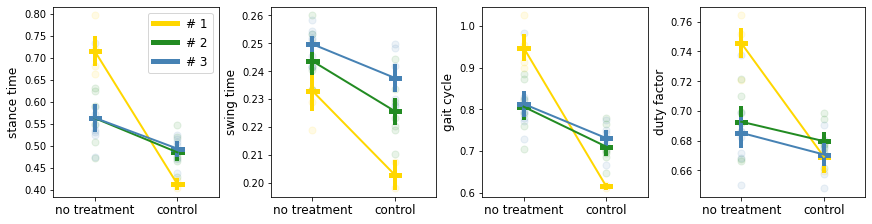

In [101]:
def paired_comparison_plot(parameters, paired_data_for_parameters, groups=[]):
     
    # set up a figure
    num_subplots = len(parameters)
    f,axes = plt.subplots(1, num_subplots, figsize = (12,3), constrained_layout = True)
    plot_colors = get_plot_colors()
    ms = 50 # marker size
    fs = 12 # fontsize
    mean_linewidth = 5
    mean_line_offset = 0.05
    connector_linewidth = 2
    
    if len(groups) == 0:
        groups = sorted(paired_data_for_parameters.keys())
    elif len(groups) > 2:
        print('Can only compare 2 groups!')
        return 
    else:
        for group in groups:
            if group not in paired_data_for_parameters.keys():
                print('No ' + group + ' in paired_data_for_parameters!')
                return
    
    num_tardigrades = len(paired_data_for_parameters[groups[0]].keys())
    connector_xcoords = np.zeros((num_tardigrades,2))
    connector_xcoords[:,1] = 1
    
    for p, parameter in enumerate(parameters):
        
        connector_ycoords = np.zeros((num_tardigrades,2))
        
        # go through each group
        for g, group in enumerate(groups):                
            
            # go through each tardigrade
            for t, tardigrade in enumerate(paired_data_for_parameters[group].keys()):
                
                # scatter plot of values for each tardigrade, with appropriate color
                y_data = paired_data_for_parameters[group][tardigrade][parameter]
                x_data = [g] * len(y_data)
                f.axes[p].scatter(x_data, y_data, s = ms, c = plot_colors[tardigrade], alpha = 0.1)
                
                
                # horizontal line at mean value of data
                mean_val = np.mean(y_data)
                
                # homemade error bar . . . 
                y_err = sem(y_data)
                f.axes[p].plot([g,g],[mean_val-y_err, mean_val+y_err],
                              linewidth = mean_linewidth-1, color = plot_colors[tardigrade])
                
                if p == 0 and g == 0:
                    f.axes[p].plot([g-mean_line_offset, g+mean_line_offset], [mean_val, mean_val],
                            linewidth = mean_linewidth, color = plot_colors[tardigrade],
                                   label = '# ' + str(tardigrade))
                else:
                    f.axes[p].plot([g-mean_line_offset, g+mean_line_offset], [mean_val, mean_val],
                            linewidth = mean_linewidth, color = plot_colors[tardigrade])
                
                # update coordinate for a line connecting means
                connector_ycoords[t][g] = mean_val
                
                # plot line connecting means for this tardigrade
                
            if p == 0:
                # add legend to axis
                f.axes[p].legend(fontsize = fs)
        
        # done with parameter, plot line connecting means for each tardigrade
        for r, ycoords in enumerate(connector_ycoords):
            col = plot_colors[r+1]
            f.axes[p].plot(connector_xcoords[r,:], ycoords, color = col, linewidth = connector_linewidth)
    
    for i, ax in enumerate(f.axes):
        ax.set_ylabel(parameters[i].replace('_',' '), fontsize = fs)
        ax.set_xlim([-0.5, 1.5])
        ax.set_xticks([0,1],[group.replace('_', ' ') for group in groups], fontsize = fs)
    
    plt.show()
    
# print(tardigrade_data)
paired_comparison_plot(parameters, tardigrade_data, ['control', 'no_treatment'])